In [258]:
import bezier
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.spatial import ConvexHull

In [259]:
nodes = np.asfortranarray([
        [1, 1.5, 2.5, 3],
        [1, 1.5 , 0.5, 1],
    ])
curve = bezier.Curve(nodes, degree=3)

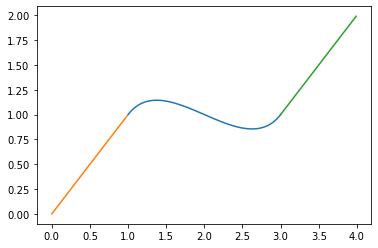

In [260]:
curve.plot(100)
plt.plot([0.01 * i for i in range(100)], [0.01 * i for i in range(100)])
plt.plot([0.01 * i + 3 for i in range(100)], [0.01 * i + 1 for i in range(100)])

In [261]:
curve.evaluate(0.5).T[0]

array([2., 1.])

In [262]:
def get_vector(segment):
    return np.array(segment[1] - segment[0])

In [263]:
get_vector(np.array([[1, 1], [2, 3]]))

array([1, 2])

In [264]:
def get_track(points):
    
    segments = []
    curves = []
    for i in range(len(points) // 2):
        segments.append([points[2*i], points[2*i+1]])
    
    segments = np.array(segments)
    for i in range(len(segments)):
        s1 = segments[i]
        s2 = segments[(i + 1) % len(segments)]
        
        v1 = 0.5 * get_vector(s1)
        v2 = 0.5 * get_vector(s2[::-1])
        
        nodes = np.vstack((s1[1], s1[1] + v1, s2[0] + v2, s2[0])).T
        
        curves.append(bezier.Curve(nodes, degree=3))
    
    return segments, curves

In [265]:
def draw_track(segments, curves):
    for s in segments:
        x_values = [s[0][0], s[1][0]]
        y_values = [s[0][1], s[1][1]]
        plt.plot(x_values, y_values)

    i = 0
    for c in curves:
        xs = [c.evaluate(x).T[0][0] for x in np.linspace(0, 1, 100)]
        ys = [c.evaluate(x).T[0][1] for x in np.linspace(0, 1, 100)]

        plt.plot(xs, ys)

        i += 1


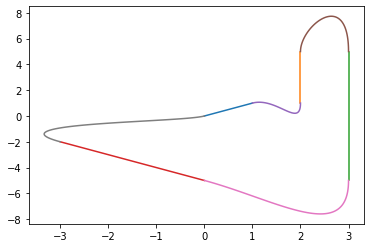

In [295]:
segments, curves = get_track([[0, 0], [1, 1], [2, 1], [2, 5], [3, 5], [3, -5], [0, -5], [-3, -2]])
draw_track(segments, curves)

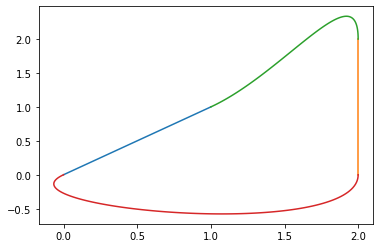

In [296]:
segments, curves = get_track([[0, 0], [1, 1], [2, 2], [2, 0]])
draw_track(segments, curves)

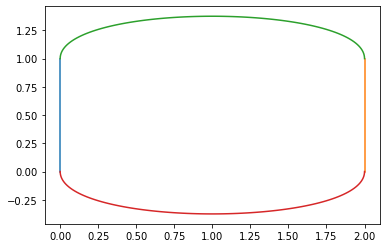

In [297]:
segments, curves = get_track([[0, 0], [0, 1], [2, 1], [2, 0]])
draw_track(segments, curves)

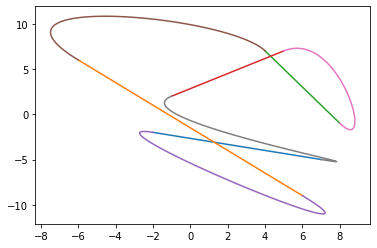

In [298]:
segments, curves = get_track([[random.randrange(-10, 10), random.randrange(-10, 10)] for _ in range(8)])
draw_track(segments, curves)

[[  0 -10]
 [  7   8]
 [  3  -1]
 [ -9  -1]
 [ -6 -10]
 [  6  -1]
 [  8   7]
 [  4  -2]
 [ -2   1]
 [  2  -6]
 [  9  -7]
 [ -6  -2]
 [ -5   1]
 [  2   1]
 [ -7   4]
 [  6  -6]
 [ -5  -9]
 [ -8   7]
 [  7   2]]

[[ -9  -1]
 [ -6 -10]
 [  0 -10]
 [  9  -7]
 [  8   7]
 [  7   8]
 [ -8   7]]


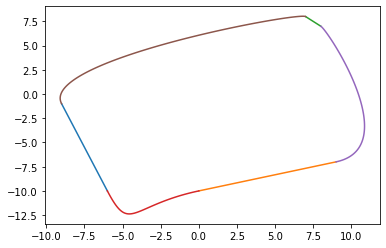

In [294]:
points = np.array([[random.randrange(-10, 10), random.randrange(-10, 10)] for _ in range(19)])

print(points)
print()
print(points[ConvexHull(points).vertices])
segments, curves = get_track(points[ConvexHull(points).vertices])
draw_track(segments, curves)